---
title: "Master's Research Project"
author: "Nick Climaco"
date: today
date-format: long
format:
  html:
    toc: true
    toc-depth: 3
    toc-float:
      toc-position: right
    html-math-method: katex
  pdf:
    toc: true
    documentclass: article
    fontsize: 11pt
    geometry: margin=0.75in
    highlight: tango
    keep-tex: true
    include-in-header: 
       text: |
         \usepackage{fvextra}
         \DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaklines,commandchars=\\\{\}}
         \DefineVerbatimEnvironment{OutputCode}{Verbatim}{breaklines,commandchars=\\\{\}}
         \fvset{breaksymbolleft={}, breakindent=1em}
jupyter: python3
---

https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset?select=male_coaches.csv

# Exploratory Data Cleaning and Analysis

In [43]:
import pandas as pd  # type: ignore
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
players = pd.read_csv('dataFiles/male_players.csv')


C:\Users\nickc\AppData\Local\Temp\ipykernel_8604\1762012927.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('dataFiles/male_players.csv')


In [3]:
players.head()


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [36]:
df_2 = players.drop(players.columns[-27:], axis=1)
other_roles_rating = players.iloc[:,-27:]


In [6]:
df_2['fifa_version'].unique()


array([24., 23., 22., 21., 20., 19., 18., 17., 16., 15.])

In [41]:
df_2.columns


Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id',
       'league_name', 'league_level', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       's

In [59]:
columns_to_drop = ['player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'long_name', 'dob', 'club_team_id', 'league_id', 'club_jersey_name', 'club_loaned_from', 'club_joined_date','club_contract_valid_until_year', 'nationality_id', 'nation_position', 'nation_jersey_number', 'international_reputation','body_type', 'real_face', 'player_tags', 'player_traits', 'player_id']
df_2 = df_2.drop(columns=[col for col in columns_to_drop if col in df_2.columns])


In [61]:
df_2.shape


(180021, 62)

In [63]:
df_2


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,...,88.0,26,34,32,13,5,7,11,6,NaN
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,...,87.0,38,47,29,7,14,13,11,7,NaN
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,...,88.0,66,70,53,15,13,5,10,13,NaN
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,...,96.0,20,35,24,6,11,15,14,8,NaN
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,...,90.0,43,24,18,13,11,5,5,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,E. Redman,CB,41,61,20000.0,2000.0,17,187,81,Newport County,...,NaN,38,40,35,12,6,15,8,6,NaN
180017,A. Collins,ST,41,50,30000.0,2000.0,17,178,57,Newport County,...,NaN,25,25,25,13,11,12,15,11,NaN
180018,P. Żemło,"LM, LB",40,50,15000.0,2000.0,18,190,76,Wisła Kraków,...,NaN,54,52,51,8,14,7,10,9,NaN
180019,T. Davies,CB,40,49,15000.0,2000.0,22,180,70,Fleetwood Town,...,NaN,36,34,35,15,13,6,11,9,NaN


In [66]:
players_cleaned = df_2.loc[:, df_2.isnull().mean() <= 0.2] 
# drop columns with more than 20% missing data


https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats

In [67]:
players_cleaned


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,...,84,88.0,26,34,32,13,5,7,11,6
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,...,84,87.0,38,47,29,7,14,13,11,7
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,...,83,88.0,66,70,53,15,13,5,10,13
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,...,75,96.0,20,35,24,6,11,15,14,8
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,...,85,90.0,43,24,18,13,11,5,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,E. Redman,CB,41,61,20000.0,2000.0,17,187,81,Newport County,...,31,NaN,38,40,35,12,6,15,8,6
180017,A. Collins,ST,41,50,30000.0,2000.0,17,178,57,Newport County,...,47,NaN,25,25,25,13,11,12,15,11
180018,P. Żemło,"LM, LB",40,50,15000.0,2000.0,18,190,76,Wisła Kraków,...,31,NaN,54,52,51,8,14,7,10,9
180019,T. Davies,CB,40,49,15000.0,2000.0,22,180,70,Fleetwood Town,...,21,NaN,36,34,35,15,13,6,11,9


In [72]:
players_cleaned.isna().mean().sort_values(ascending=False)


mentality_composure            0.182690
physic                         0.111231
defending                      0.111231
dribbling                      0.111231
passing                        0.111231
shooting                       0.111231
pace                           0.111231
league_level                   0.012499
value_eur                      0.011960
club_jersey_number             0.010360
club_position                  0.010360
league_name                    0.010360
club_name                      0.010360
wage_eur                       0.010265
mentality_positioning          0.000000
power_strength                 0.000000
power_long_shots               0.000000
power_stamina                  0.000000
mentality_aggression           0.000000
mentality_interceptions        0.000000
power_jumping                  0.000000
power_shot_power               0.000000
movement_balance               0.000000
movement_reactions             0.000000
short_name                     0.000000


# Imputation by KNN 

In [73]:
from sklearn.impute import KNNImputer

# Select only the numerical columns
numerical_cols = players_cleaned.select_dtypes(include=[np.number]).columns

# Initialize the KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values for numerical columns
players_cleaned[numerical_cols] = imputer.fit_transform(players_cleaned[numerical_cols])

# Display the imputed dataframe
players_cleaned.head()

# completed in 20 mins 30 seconds


C:\Users\nickc\AppData\Local\Temp\ipykernel_8604\3293559458.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_cleaned[numerical_cols] = imputer.fit_transform(players_cleaned[numerical_cols])


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,K. Mbappé,"ST, LW",91.0,94.0,181500000.0,230000.0,24.0,182.0,75.0,Paris Saint Germain,...,84.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
1,E. Haaland,ST,91.0,94.0,185000000.0,340000.0,22.0,195.0,94.0,Manchester City,...,84.0,87.0,38.0,47.0,29.0,7.0,14.0,13.0,11.0,7.0
2,K. De Bruyne,"CM, CAM",91.0,91.0,103000000.0,350000.0,32.0,181.0,75.0,Manchester City,...,83.0,88.0,66.0,70.0,53.0,15.0,13.0,5.0,10.0,13.0
3,L. Messi,"CF, CAM",90.0,90.0,41000000.0,23000.0,36.0,169.0,67.0,Inter Miami,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
4,K. Benzema,"CF, ST",90.0,90.0,51000000.0,95000.0,35.0,185.0,81.0,Al Ittihad,...,85.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0


In [74]:
players_cleaned


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,K. Mbappé,"ST, LW",91.0,94.0,181500000.0,230000.0,24.0,182.0,75.0,Paris Saint Germain,...,84.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
1,E. Haaland,ST,91.0,94.0,185000000.0,340000.0,22.0,195.0,94.0,Manchester City,...,84.0,87.0,38.0,47.0,29.0,7.0,14.0,13.0,11.0,7.0
2,K. De Bruyne,"CM, CAM",91.0,91.0,103000000.0,350000.0,32.0,181.0,75.0,Manchester City,...,83.0,88.0,66.0,70.0,53.0,15.0,13.0,5.0,10.0,13.0
3,L. Messi,"CF, CAM",90.0,90.0,41000000.0,23000.0,36.0,169.0,67.0,Inter Miami,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
4,K. Benzema,"CF, ST",90.0,90.0,51000000.0,95000.0,35.0,185.0,81.0,Al Ittihad,...,85.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,E. Redman,CB,41.0,61.0,20000.0,2000.0,17.0,187.0,81.0,Newport County,...,31.0,37.8,38.0,40.0,35.0,12.0,6.0,15.0,8.0,6.0
180017,A. Collins,ST,41.0,50.0,30000.0,2000.0,17.0,178.0,57.0,Newport County,...,47.0,44.0,25.0,25.0,25.0,13.0,11.0,12.0,15.0,11.0
180018,P. Żemło,"LM, LB",40.0,50.0,15000.0,2000.0,18.0,190.0,76.0,Wisła Kraków,...,31.0,40.8,54.0,52.0,51.0,8.0,14.0,7.0,10.0,9.0
180019,T. Davies,CB,40.0,49.0,15000.0,2000.0,22.0,180.0,70.0,Fleetwood Town,...,21.0,37.8,36.0,34.0,35.0,15.0,13.0,6.0,11.0,9.0


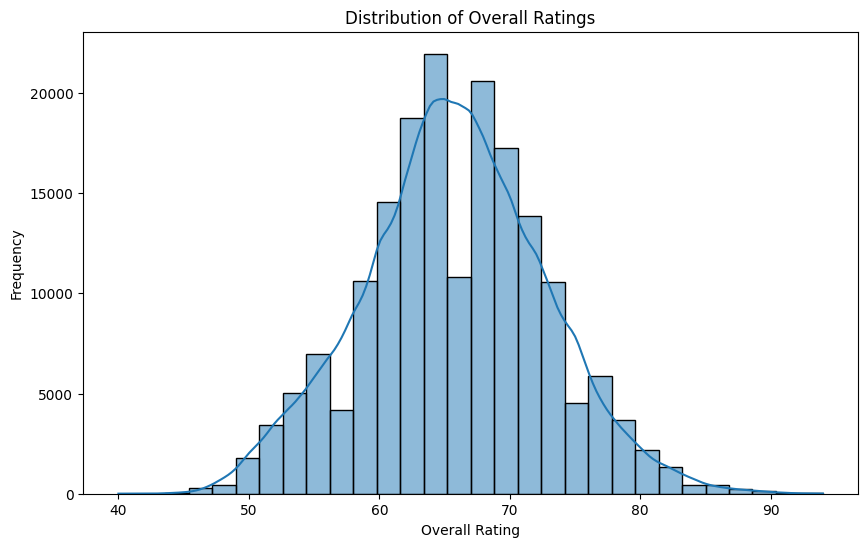

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(players_cleaned['overall'], bins=30, kde=True) # type: ignore
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


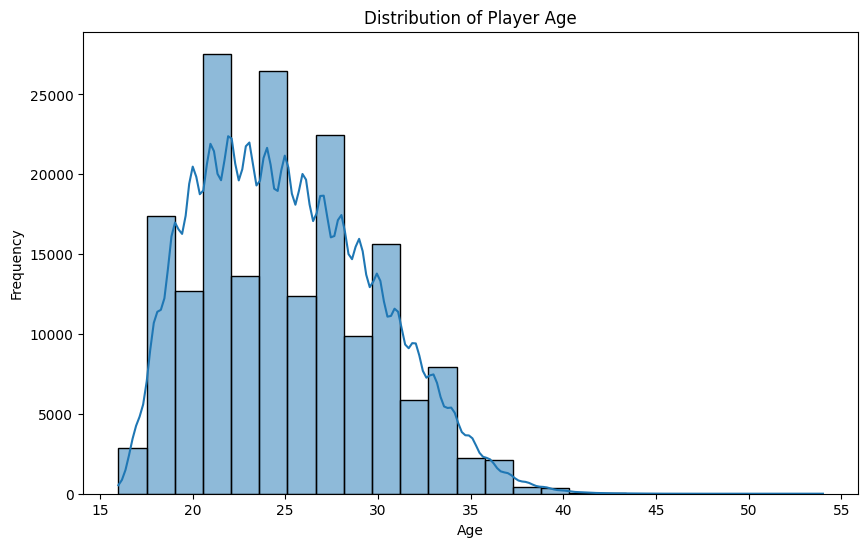

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(players_cleaned['age'], bins=25, kde=True) # type: ignore
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
